# Named Entity Recognition task using RoBERTa
## test 2

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/1350 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<ipython-input-3-49ecc3e5bc2d>:172: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.809600,0.582829,0.507895,0.571006,0.537604,0.833397
2,0.522400,0.401721,0.568650,0.735207,0.641290,0.875048
3,0.382100,0.362480,0.596963,0.755917,0.667102,0.884937
4,0.256600,0.344324,0.621557,0.767751,0.686962,0.891213
5,0.265900,0.350838,0.613555,0.763314,0.680290,0.887410


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-sco

{'eval_loss': 0.34432414174079895, 'eval_precision': 0.6215568862275449, 'eval_recall': 0.7677514792899408, 'eval_f1': 0.686962276637988, 'eval_accuracy': 0.891213389121339, 'eval_runtime': 0.6329, 'eval_samples_per_second': 316.023, 'eval_steps_per_second': 20.542, 'epoch': 5.0}


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                     precision    recall  f1-score   support

B-DocumentReference       1.00      0.12      0.22         8
         B-Location       0.76      0.81      0.79       155
 B-MilitaryPlatform       0.41      0.44      0.42        16
            B-Money       0.00      0.00      0.00         4
      B-Nationality       0.75      0.30      0.43        10
     B-Organisation       0.73      0.82      0.77       284
           B-Person       0.85      0.94      0.90       106
         B-Quantity       0.56      0.93      0.70        30
         B-Temporal       0.72      0.89      0.80        46
           B-Weapon       0.41      0.53      0.46        17
I-DocumentReference       0.57      0.80      0.67        20
         I-Location       0.76      0.86      0.81       191
 I-MilitaryPlatform       0.69      0.69      0.69        26
            I-Money       0.00      0.00      0.00         9
      I-Nationality       0.00      0.00      0.00         2


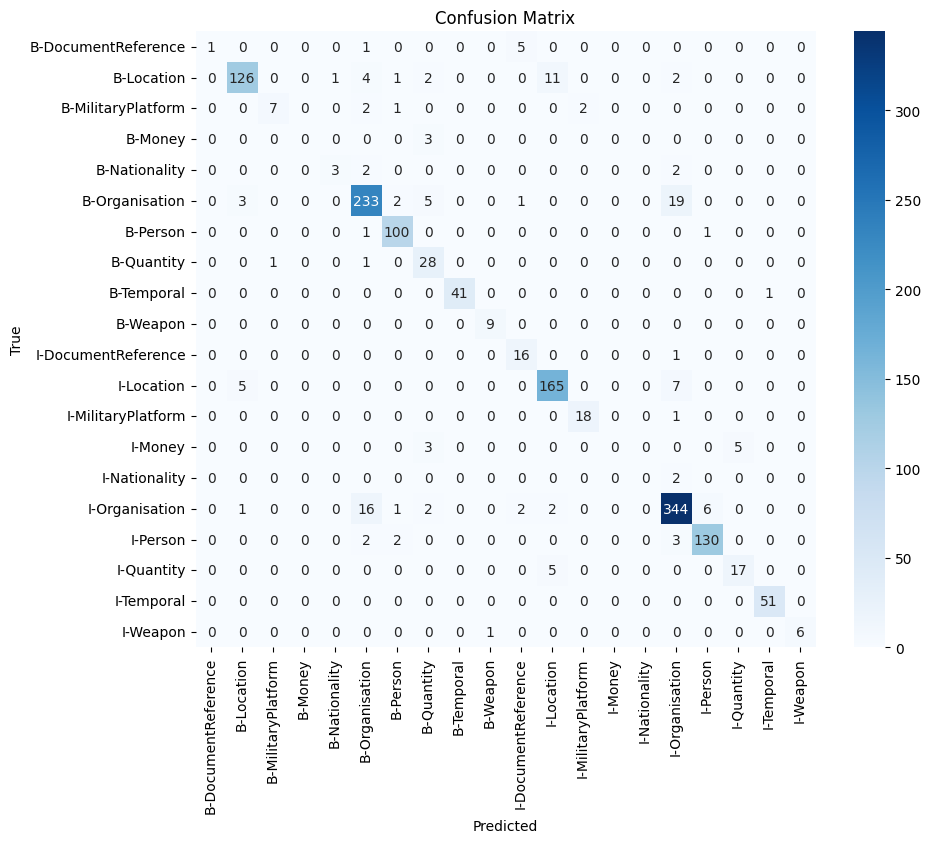

ValueError: x and y must have same first dimension, but have shapes (42,) and (6,)

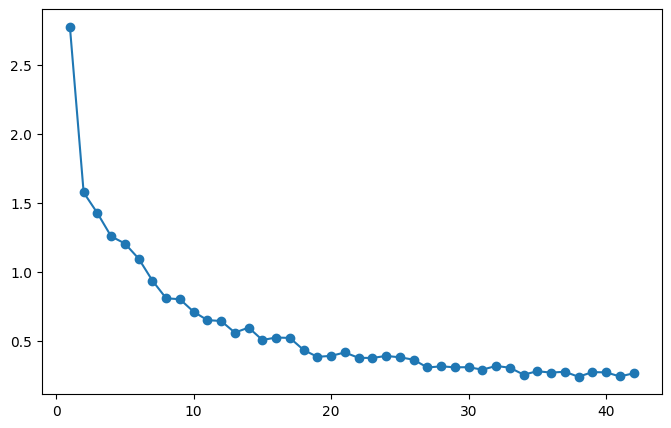

In [ ]:
!pip install transformers datasets seqeval scikit-learn nlpaug evaluate -q

import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from sklearn.utils.class_weight import compute_class_weight
from evaluate import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import nlpaug.augmenter.word as naw
!pip install nltk -q
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


# Function to load CoNLL files and parse sentences and tags
def load_conll_file(filepath):
    sentences = []
    tags = []
    with open(filepath, "r") as file:
        sentence = []
        tag_sequence = []
        for line in file:
            line = line.strip()
            if not line:  # Fine frase
                if sentence:
                    sentences.append(sentence)
                    tags.append(tag_sequence)
                sentence = []
                tag_sequence = []
            else:
                token, tag = line.split()[:2]  # Token e Tag
                sentence.append(token)
                tag_sequence.append(tag)
        if sentence:  # Aggiungi l'ultima frase
            sentences.append(sentence)
            tags.append(tag_sequence)
    return sentences, tags


# Load training and test data from CoNLL format
train_sentences, train_tags = load_conll_file("/content/re3d-train.conll")
test_sentences, test_tags = load_conll_file("/content/re3d-test.conll")


# Preparing the dataset by encoding tags into numerical IDs
unique_tags = sorted(set(tag for tags in train_tags for tag in tags))
tag2id = {tag: i for i, tag in enumerate(unique_tags)}
id2tag = {i: tag for tag, i in tag2id.items()}


# Function to encode tags into numerical IDs
def encode_tags(tags, tag2id):
    return [[tag2id[tag] for tag in sentence_tags] for sentence_tags in tags]

train_tag_ids = encode_tags(train_tags, tag2id)
test_tag_ids = encode_tags(test_tags, tag2id)


# Convert data into Dataset format
train_data = [{"tokens": tokens, "tags": tags} for tokens, tags in zip(train_sentences, train_tag_ids)]
test_data = [{"tokens": tokens, "tags": tags} for tokens, tags in zip(test_sentences, test_tag_ids)]

dataset = DatasetDict({
    "train": Dataset.from_list(train_data),
    "test": Dataset.from_list(test_data),
})


# Data Augmentation
def augment_data(dataset, target_label, n_augment=5):
    """
    Augments the dataset by generating new sentences using synonym replacement.

    Args:
        dataset: The dataset to augment.
        target_label: The label to augment.
        n_augment: Number of augmented samples to generate per example.

    Returns:
        A list of augmented examples.
    """
    aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3)
    augmented_data = []
    for example in dataset:
        if target_label in example["tags"]:
            for _ in range(n_augment):
                augmented_text = aug.augment(example["tokens"])
                augmented_data.append({
                    "tokens": augmented_text,
                    "tags": example["tags"]
                })
    return augmented_data


# Augment low-frequency labels
low_freq_labels = ["B-MilitaryPlatform", "B-Nationality", "B-Weapon"]
augmented_train = []
for label in low_freq_labels:
    augmented_train += augment_data(train_data, tag2id[label], n_augment=5)

train_data += augmented_train
dataset["train"] = Dataset.from_list(train_data)


# Tokenization and alignment of labels
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name, add_prefix_space=True)


# Function to tokenize inputs and align labels with tokenized sequences
def tokenize_and_align_labels(examples):
    """
    Tokenizes the input sentences and aligns the labels to the tokenized output.

    Args:
        examples: A dictionary containing tokens and tags.

    Returns:
        A dictionary containing tokenized inputs and aligned labels.
    """
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True, padding="max_length", max_length=128
    )
    labels = []
    for i, label in enumerate(examples["tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        label_ids = []
        previous_word_id = None
        for word_id in word_ids:
            if word_id is None:
                label_ids.append(-100)  # Ignora padding
            elif word_id != previous_word_id:  # Primo token della parola
                label_ids.append(label[word_id])
            else:  # Token aggiuntivi
                label_ids.append(-100)
            previous_word_id = word_id
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = dataset.map(tokenize_and_align_labels, batched=True)


# Define the model and training parameters
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(unique_tags))
model.config.id2label = id2tag
model.config.label2id = tag2id

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    save_strategy="epoch",
    fp16=True  # Abilitazione della precisione mista
)


# Evaluation metrics using seqeval
metric = load("seqeval")


def compute_metrics(eval_pred):
    """
    Computes evaluation metrics for token classification.

    Args:
        eval_pred: A tuple containing predictions and labels.

    Returns:
        A dictionary with precision, recall, F1 score, and accuracy.
    """
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=2)

    true_labels = [[id2tag[label] for label in sentence if label != -100] for sentence in labels]
    true_predictions = [[id2tag[pred] for pred, label in zip(sentence, labels[i]) if label != -100]
                        for i, sentence in enumerate(predictions)]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }


# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


# Train the model
trainer.train()


# Final evaluation
results = trainer.evaluate()
print(results)


# Visualization of results
def generate_classification_report(trainer, dataset, id2tag):
    """
    Generates a classification report from model predictions.

    Args:
        trainer: The Trainer object.
        dataset: The dataset to evaluate.
        id2tag: Dictionary mapping IDs to tags.

    Returns:
        True labels and predicted labels.
    """
    predictions, labels, _ = trainer.predict(dataset)
    predictions = np.argmax(predictions, axis=2)

    true_labels = [[id2tag[label] for label in sentence if label != -100] for sentence in labels]
    true_predictions = [[id2tag[pred] for pred, label in zip(sentence, labels[i]) if label != -100]
                        for i, sentence in enumerate(predictions)]

    y_true = [label for sentence in true_labels for label in sentence]
    y_pred = [pred for sentence in true_predictions for pred in sentence]

    report = classification_report(y_true, y_pred, labels=list(id2tag.values()), zero_division=0)
    print("Classification Report:")
    print(report)
    return y_true, y_pred


# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix of the predictions.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        classes: List of class names.
    """
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


y_true, y_pred = generate_classification_report(trainer, tokenized_datasets["test"], id2tag)
classes = [tag for tag in unique_tags if tag != "O"]
plot_confusion_matrix(y_true, y_pred, classes)


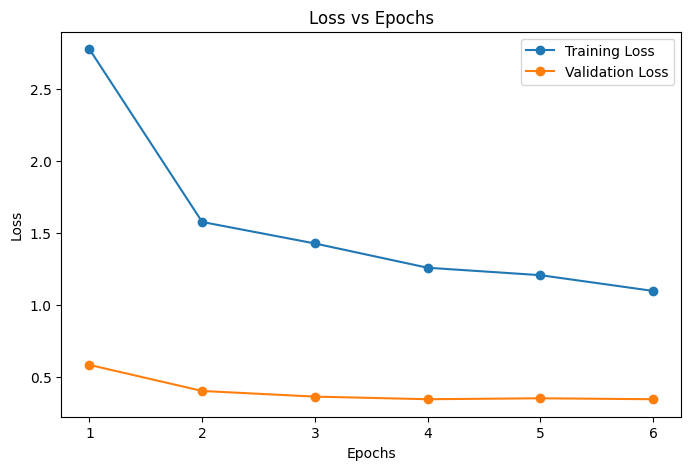

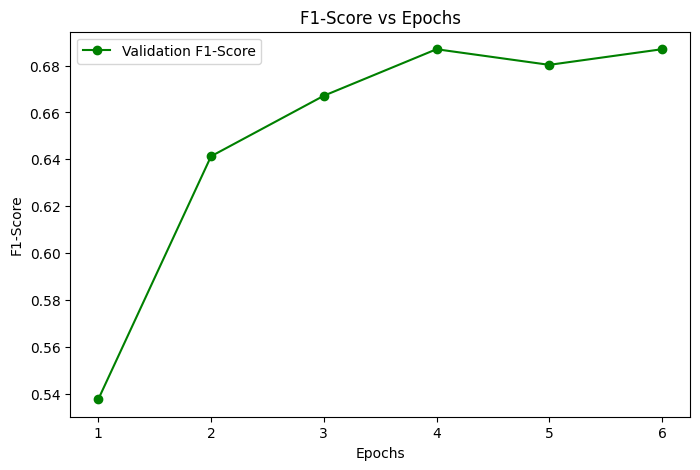

In [ ]:
def plot_training_metrics(log_history):
    """
    Plots training and evaluation metrics such as loss and F1-score over epochs.

    Args:
        log_history: A list of logs containing training and evaluation metrics for each step/epoch.

    Returns:
        None. Displays plots for training loss, validation loss, and validation F1-score.
    """
    train_loss = [entry["loss"] for entry in log_history if "loss" in entry]
    eval_loss = [entry["eval_loss"] for entry in log_history if "eval_loss" in entry]
    eval_f1 = [entry["eval_f1"] for entry in log_history if "eval_f1" in entry]

    # Get the number of epochs for the x-axis
    epochs = range(1, len(eval_loss) + 1) # Use len(eval_loss) to get the correct number of epochs

    # Perdita
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_loss[:len(eval_loss)], label="Training Loss", marker="o") # Adjust train_loss to match eval_loss length
    plt.plot(epochs, eval_loss, label="Validation Loss", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")
    plt.legend()
    plt.show()

    # F1-Score
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, eval_f1, label="Validation F1-Score", marker="o", color="green")
    plt.xlabel("Epochs")
    plt.ylabel("F1-Score")
    plt.title("F1-Score vs Epochs")
    plt.legend()
    plt.show()

plot_training_metrics(trainer.state.log_history)
